<a href="https://colab.research.google.com/github/RAMANAN31/python.Ram/blob/main/lab1_1150_deep_learning(perceptron)_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as nu


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
iris=load_iris()
X=iris.data
y=iris.target

In [ ]:
#to data frame
data=pd.DataFrame(X,columns=iris.feature_names)
data['target']=y

In [ ]:
#exclude the third category
data=data[data['target']!=2]

In [ ]:
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [ ]:
data.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [ ]:
data.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
4.3                3.0               1.1                0.1               0         1
5.7                2.6               3.5                1.0               1         1
5.8                4.0               1.2                0.2               0         1
                   2.7               4.1                1.0               1         1
                                     3.9                1.2               1         1
                                                                                   ..
5.0                3.6               1.4                0.2               0         1
                   3.5               1.6                0.6               0         1
                                     1.3                0.3               0         1
                   3.4               1.6                0.4               0         1
7.0                3.2               4.7                1.4

In [ ]:
#data preprocessing

X = data.drop(['target'], axis=1)
y = data['target']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(100, 4)
(100,)


In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Step 3: Standardize the data (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Step 4: Create and train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(eta0=0.1, random_state=42)

In [ ]:
# Step 5: Make predictions on the test set
y_pred = perceptron.predict(X_test)



In [ ]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classif_rep=classification_report(y_test,y_pred)

In [ ]:
print(f"Accuracy of the Perceptron model: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(classif_rep)

Accuracy of the Perceptron model: 1.0000
Confusion Matrix:
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Step 7: (Optional) Visualize the decision boundaries if you use only two features
# For simplicity, we will use only the first two features (sepal length and sepal width)
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]


In [ ]:
'''# Recreate the Perceptron model on only two features
perceptron_2D = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron_2D.fit(X_train_2D, y_train)

# Create a meshgrid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = perceptron_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plotting the data points
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette="Set1", edgecolor='k', s=100)
plt.title("Perceptron Decision Boundary (using Sepal Length and Sepal Width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
'''

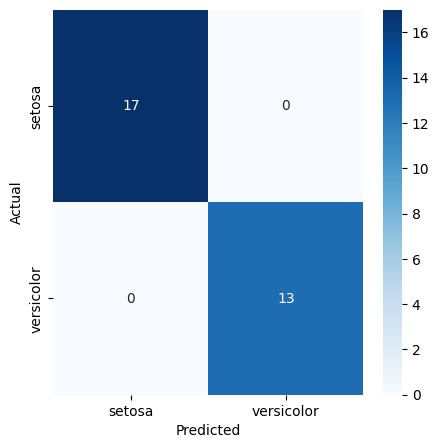

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=iris.target_names[:2],
           yticklabels=iris.target_names[:2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Explanation of Key Metrics:

In [ ]:
Accuracy: The models accuracy of 1.00 means that it correctly predicted all 30 samples in the dataset (both classes).

In [ ]:
Confusion Matrix: The confusion matrix provides a more detailed view of how the model performed. In your case, it shows no misclassifications, with 17 correct predictions for Class 0 and 13 for Class 1.

Precision: Precision is 1.00 for both classes, meaning there were no false positives (incorrectly classifying an instance as a positive when it was actually negative).



In [ ]:
Recall: Recall is also 1.00 for both classes, meaning the model correctly identified all positive instances without missing any.

F1-Score: The F1-score, which combines precision and recall into a single metric, is also 1.00 for both classes,
            indicating that the model achieved perfect performance for both.
